# Softmax functie
Om uiteindelijk een totaal plaatje te krijgen van een CNN 
moet het programma ook voorspellingen kunnen maken aan de 
hand van kansen. Dit wordt gedaan door de laatste layer genaamd 
de soft max. Dit is een dense layer (volledig verbonden) wat gebruik 
maakt van de Softmax functie, ook wel activatie functie genoemd zoals 
je die misschien wel kent als Sigmoid, Tanh of ReLu.


Absolute waarden worden omgezet naar relatieve waarden (ten opzichte van elkaar, zodat de som van de waarden 1 is)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from IPython.display import Image
%matplotlib inline 

### Wanneer er een CNN wordt gebouwd kan er als parameter voor 'Activation' een Softmax functie gekozen worden. Wij zullen echter de achtergrond van deze functie wat meer benadrukken zodat je ook precies weet wat er eigenlijk gebeurt. Stap voor stap zal worden verteld hoe de functie in elkaar zit zodat je het zelf kunt schrijven

### De wiskundige notatie voor de Softmax functie:
$${Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j\exp(x_j)}$$

Hoewel de wiskundige notatie er wat 'lastig' uit kan zien, is dit makkelijk te herschrijven in een Python functie.        

## Dog or cat?

In [2]:
Image(url="https://bit.ly/2wWweqd")

### Stap 1
- In het voorbeeld hierboven wordt er gekeken of het input gegeven een 'Dog' of 'Cat' is. We zullen hiervoor naar de laatste rode omcirkelde nodes moeten gaan kijken. Deze houden namelijk een waarde vast die door onze Softmax functie heen gaat. *(note: in de foto zie je al dat er een uitkomst is van z1 = 95% en z2 = 5%)*

- Aangezien er geen waarden zijn meegegeven in de foto zullen we zelf even ter illustratie getallen meegeven:
    - [[3,1]] --> dog=3, cat=1

- Deze waarden gaan elk tot de macht het grondgetal e: 'Numerator'
    - $e^3$
    - $e^1$

### Stap 2 

- Door vervolgens alle uitkomsten bij elkaar op te tellen krijg je de 'Denominator'
    - $e^3$ = 20.088
    - $e^1$ = 2.7182
    - 20.088 + 2.718282 = 22.7

### Stap 3

- De kans wordt berekend door: 
    - Numerator / Denominator 
    - ($e^3$ / 22.7) = 0.884..
    - ($e^1$ / 22.7) = 0.119..

### Wat betekenen deze uitkomsten?
- 'Dog' krijgt een probability van 0.884 wat 88% is
- 'Cat' krijgt een veel lagere probability van 0.119, dus 12% 
- Het model kan dus met 88% zekerheid zeggen dat het gegeven input een foto is van een hond. Maar ook met 12% zekerheid zeggen dat het een kat is. 

#### BELANGRIJK: *Voor de kansberekening geldt dat deze waarden samen uitkomen op 100%*



In [16]:
"""Geef een lijst op met willekeurige output nodes"""
nodes = [0.5,1,3,4,1.5] # delete input

In [11]:
def softmax_functie(nodes):
    """
    Dit wordt de Softmax functie zoals je hebt gelezen in de voorgaande stappen:
    - bereken de numerator
    - bereken de denominator
    - return hiermee uiteindelijk de 'kans' functie
    """
    numerator = np.exp(nodes) # delete
    denominator = sum(numerator) # delete

    return numerator / denominator # delete
    # pass

In [22]:
"""Plot functie"""
def plot_me(nodes):
    plt.title("Output of nodes")
    for i, j in enumerate(nodes):
        plt.bar(i,j)
    plt.show()

 ### Output nodes van de hidden layer waarvan de softmax functie nog niet is toegepast
 Zoals je ziet kun je al in een oogopslag zien welke uitkomst het grootst is. Het nut van de Softmax functie zit hem dan ook meer in de waarschijnlijkheid wat meer toegevoegde waarde heeft. 

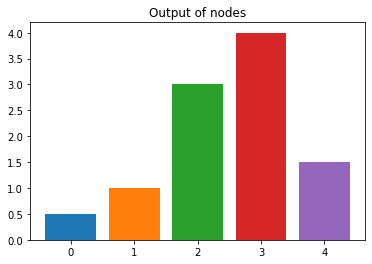

In [23]:
plot_me(nodes)

### Haal nu die output nodes eerst door de Softmax functie heen om het vervolgens weer te plotten

In [18]:
softmax_nodes = softmax_functie(nodes)
print("Output nodes after applying the Softmax function: {}".format(softmax_nodes))

total_softmax_nodes = sum(softmax_nodes)
print("Sum of the probabilities: {}".format(total_softmax_nodes))

Output nodes after applying the Softmax function: [0.01973751 0.03254165 0.24045211 0.6536166  0.05365212]
Sum of the probabilities: 1.0


### Grafiek na het gebruiken van de Softmax functie
Wat de Softmax functie, zoals je ziet doet is het vergroten van de verschillen door te normalizeren. 

            "Push one result closer to 1 while another closer to 0"

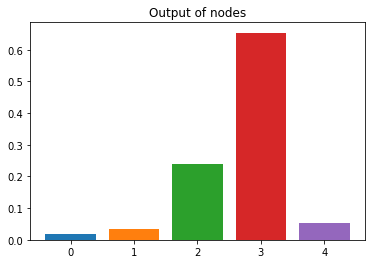

In [24]:
plot_me(softmax_nodes)

#### Zoals je ziet is het heel makkelijk om handmatig de Softmax functie te schrijven en gebruiken. We hebben de output van elke node namelijk geherdefinieerd en uitkomsten gegeven van 0 tot 1. 

